# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = '/data'
!pip install matplotlib==2.0.2
# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

    100% |████████████████████████████████| 14.6MB 36kB/s  eta 0:00:01   63% |████████████████████▍           | 9.3MB 28.2MB/s eta 0:00:01
  Found existing installation: matplotlib 2.1.0
    Uninstalling matplotlib-2.1.0:
      Successfully uninstalled matplotlib-2.1.0
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

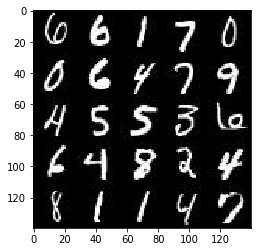

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

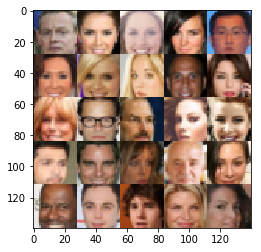

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [7]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name="input_real")
    input_z = tf.placeholder(tf.float32, (None, z_dim), name="input_z")
    learning_rate = tf.placeholder(tf.float32, None, name="learning_rate")
    
    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 497, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start\n    handler_func(fd_obj, events)', 'File "/opt/conda/lib/

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [9]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    def leaky_relu(x, alpha=0.2):
        return tf.maximum(alpha * x, x)
    
    def conv(inputs, filters, batch_norm=True):
        outputs = tf.layers.conv2d(inputs, filters, 5, 2, 'same')
        if batch_norm:
            outputs = tf.layers.batch_normalization(outputs, training=True)
        return leaky_relu(outputs)
    
    with tf.variable_scope("discriminator", reuse=reuse):
        # input 28*28*3
        conv1 = conv(images, 64, batch_norm=False)
        conv2 = conv(conv1, 128)
        conv3 = conv(conv2, 256)
        
        flat = tf.reshape(conv3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

        return out, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [10]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    def leaky_relu(x, alpha=0.2):
        return tf.maximum(alpha * x, x)
    
    kernel = 5
    
    with tf.variable_scope("generator", reuse=not is_train):
        conv1 = tf.layers.dense(z, 7*7*512)
        conv1 = tf.reshape(conv1, (-1, 7, 7, 512))
        conv1 = tf.layers.batch_normalization(conv1, training=is_train)
        conv1 = leaky_relu(conv1)
        
        conv2 = tf.layers.conv2d_transpose(conv1, 256, kernel, 1, 'SAME')
        conv2 = tf.layers.batch_normalization(conv2, training=is_train)
        conv2 = leaky_relu(conv2)
        
        conv3 = tf.layers.conv2d_transpose(conv2, 128, kernel, 2, 'SAME')
        conv3 = tf.layers.batch_normalization(conv3, training=is_train)
        conv3 = leaky_relu(conv3)
    
        logits = tf.layers.conv2d_transpose(conv3, out_channel_dim, kernel, 2, 'SAME')
        out = tf.tanh(logits)

        return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [11]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * 0.9)) #smooth
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [12]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]

    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [13]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [19]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    _, image_width, image_height, image_channels = data_shape
    
    input_real, input_z, lr = model_inputs(image_width, image_height, image_channels, z_dim)
    
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    saver = tf.train.Saver()
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            steps = 0
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps +=1
                batch_images = batch_images * 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                
                if steps % 10 == 0:
                    train_loss_d = d_loss.eval({input_real: batch_images, input_z: batch_z})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Batch {}...".format(steps),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, show_n_images, input_z, image_channels, data_image_mode)
                
                saver.save(sess, './checkpoints/generator.ckpt')

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Batch 10... Discriminator Loss: 1.1254... Generator Loss: 0.8913
Epoch 1/2... Batch 20... Discriminator Loss: 0.5680... Generator Loss: 1.9778
Epoch 1/2... Batch 30... Discriminator Loss: 1.4463... Generator Loss: 0.5161
Epoch 1/2... Batch 40... Discriminator Loss: 0.8389... Generator Loss: 1.9015
Epoch 1/2... Batch 50... Discriminator Loss: 1.5692... Generator Loss: 2.7992
Epoch 1/2... Batch 60... Discriminator Loss: 0.8647... Generator Loss: 1.3290
Epoch 1/2... Batch 70... Discriminator Loss: 0.9446... Generator Loss: 1.2743
Epoch 1/2... Batch 80... Discriminator Loss: 1.1567... Generator Loss: 1.0960
Epoch 1/2... Batch 90... Discriminator Loss: 1.6216... Generator Loss: 0.5094
Epoch 1/2... Batch 100... Discriminator Loss: 1.2950... Generator Loss: 1.6357


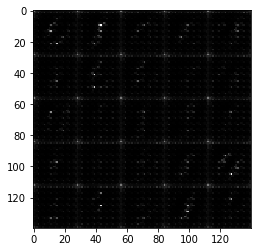

Epoch 1/2... Batch 110... Discriminator Loss: 1.3956... Generator Loss: 0.5258
Epoch 1/2... Batch 120... Discriminator Loss: 1.0764... Generator Loss: 1.2792
Epoch 1/2... Batch 130... Discriminator Loss: 1.4949... Generator Loss: 0.5326
Epoch 1/2... Batch 140... Discriminator Loss: 1.1964... Generator Loss: 1.1131
Epoch 1/2... Batch 150... Discriminator Loss: 1.1058... Generator Loss: 1.1018
Epoch 1/2... Batch 160... Discriminator Loss: 1.2402... Generator Loss: 1.6951
Epoch 1/2... Batch 170... Discriminator Loss: 1.1581... Generator Loss: 1.3124
Epoch 1/2... Batch 180... Discriminator Loss: 1.0904... Generator Loss: 1.3595
Epoch 1/2... Batch 190... Discriminator Loss: 1.1311... Generator Loss: 0.9231
Epoch 1/2... Batch 200... Discriminator Loss: 1.1654... Generator Loss: 1.4937


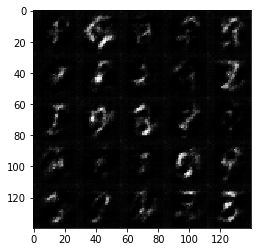

Epoch 1/2... Batch 210... Discriminator Loss: 1.3656... Generator Loss: 1.7996
Epoch 1/2... Batch 220... Discriminator Loss: 1.0366... Generator Loss: 1.2647
Epoch 1/2... Batch 230... Discriminator Loss: 1.2682... Generator Loss: 1.9497
Epoch 1/2... Batch 240... Discriminator Loss: 1.1322... Generator Loss: 1.9518
Epoch 1/2... Batch 250... Discriminator Loss: 1.1196... Generator Loss: 1.5819
Epoch 1/2... Batch 260... Discriminator Loss: 1.0896... Generator Loss: 0.9081
Epoch 1/2... Batch 270... Discriminator Loss: 0.9546... Generator Loss: 1.4357
Epoch 1/2... Batch 280... Discriminator Loss: 1.0289... Generator Loss: 1.7523
Epoch 1/2... Batch 290... Discriminator Loss: 0.9695... Generator Loss: 1.0471
Epoch 1/2... Batch 300... Discriminator Loss: 1.0726... Generator Loss: 0.8794


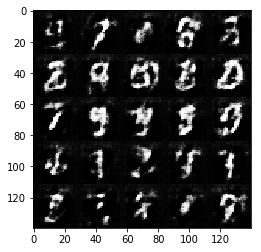

Epoch 1/2... Batch 310... Discriminator Loss: 1.0988... Generator Loss: 0.7369
Epoch 1/2... Batch 320... Discriminator Loss: 1.0822... Generator Loss: 0.7742
Epoch 1/2... Batch 330... Discriminator Loss: 0.9279... Generator Loss: 1.3143
Epoch 1/2... Batch 340... Discriminator Loss: 0.9819... Generator Loss: 1.6088
Epoch 1/2... Batch 350... Discriminator Loss: 0.9213... Generator Loss: 1.4240
Epoch 1/2... Batch 360... Discriminator Loss: 0.9510... Generator Loss: 1.0086
Epoch 1/2... Batch 370... Discriminator Loss: 0.9356... Generator Loss: 1.1938
Epoch 1/2... Batch 380... Discriminator Loss: 0.8993... Generator Loss: 1.3456
Epoch 1/2... Batch 390... Discriminator Loss: 1.0955... Generator Loss: 1.9881
Epoch 1/2... Batch 400... Discriminator Loss: 0.9392... Generator Loss: 1.1932


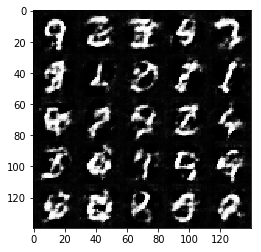

Epoch 1/2... Batch 410... Discriminator Loss: 0.9825... Generator Loss: 0.9751
Epoch 1/2... Batch 420... Discriminator Loss: 1.0391... Generator Loss: 0.9253
Epoch 1/2... Batch 430... Discriminator Loss: 1.0289... Generator Loss: 1.5356
Epoch 1/2... Batch 440... Discriminator Loss: 0.9429... Generator Loss: 1.3362
Epoch 1/2... Batch 450... Discriminator Loss: 0.9550... Generator Loss: 1.0854
Epoch 1/2... Batch 460... Discriminator Loss: 1.1284... Generator Loss: 0.7042
Epoch 2/2... Batch 10... Discriminator Loss: 1.1694... Generator Loss: 1.8375
Epoch 2/2... Batch 20... Discriminator Loss: 1.1568... Generator Loss: 1.8063
Epoch 2/2... Batch 30... Discriminator Loss: 0.9835... Generator Loss: 1.1575
Epoch 2/2... Batch 40... Discriminator Loss: 1.0755... Generator Loss: 0.8363
Epoch 2/2... Batch 50... Discriminator Loss: 1.2431... Generator Loss: 0.6311
Epoch 2/2... Batch 60... Discriminator Loss: 1.1912... Generator Loss: 1.7774
Epoch 2/2... Batch 70... Discriminator Loss: 1.0361... Gen

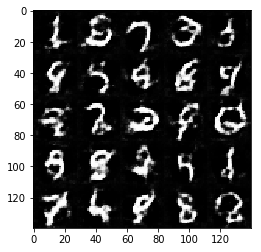

Epoch 2/2... Batch 110... Discriminator Loss: 1.1136... Generator Loss: 1.4484
Epoch 2/2... Batch 120... Discriminator Loss: 1.0077... Generator Loss: 1.4071
Epoch 2/2... Batch 130... Discriminator Loss: 1.0545... Generator Loss: 1.2174
Epoch 2/2... Batch 140... Discriminator Loss: 1.0505... Generator Loss: 1.2065
Epoch 2/2... Batch 150... Discriminator Loss: 1.1186... Generator Loss: 1.3623
Epoch 2/2... Batch 160... Discriminator Loss: 1.4822... Generator Loss: 0.4311
Epoch 2/2... Batch 170... Discriminator Loss: 0.9388... Generator Loss: 1.1212
Epoch 2/2... Batch 180... Discriminator Loss: 1.3584... Generator Loss: 0.5040
Epoch 2/2... Batch 190... Discriminator Loss: 1.2104... Generator Loss: 0.6469
Epoch 2/2... Batch 200... Discriminator Loss: 1.1011... Generator Loss: 0.7595


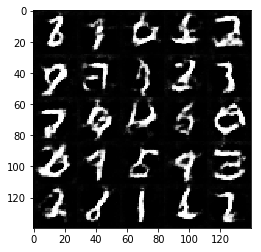

Epoch 2/2... Batch 210... Discriminator Loss: 1.0952... Generator Loss: 0.9150
Epoch 2/2... Batch 220... Discriminator Loss: 1.0045... Generator Loss: 1.3194
Epoch 2/2... Batch 230... Discriminator Loss: 1.1663... Generator Loss: 0.6786
Epoch 2/2... Batch 240... Discriminator Loss: 1.1425... Generator Loss: 1.9300
Epoch 2/2... Batch 250... Discriminator Loss: 0.9864... Generator Loss: 0.9764
Epoch 2/2... Batch 260... Discriminator Loss: 1.7757... Generator Loss: 0.3228
Epoch 2/2... Batch 270... Discriminator Loss: 1.2606... Generator Loss: 1.9821
Epoch 2/2... Batch 280... Discriminator Loss: 0.9574... Generator Loss: 1.2715
Epoch 2/2... Batch 290... Discriminator Loss: 1.1797... Generator Loss: 0.6503
Epoch 2/2... Batch 300... Discriminator Loss: 1.0384... Generator Loss: 0.9540


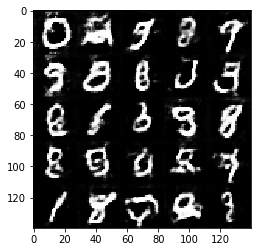

Epoch 2/2... Batch 310... Discriminator Loss: 1.1064... Generator Loss: 0.7431
Epoch 2/2... Batch 320... Discriminator Loss: 0.9547... Generator Loss: 1.3423
Epoch 2/2... Batch 330... Discriminator Loss: 0.9703... Generator Loss: 1.5815
Epoch 2/2... Batch 340... Discriminator Loss: 1.2553... Generator Loss: 1.4727
Epoch 2/2... Batch 350... Discriminator Loss: 1.2015... Generator Loss: 0.7309
Epoch 2/2... Batch 360... Discriminator Loss: 0.9767... Generator Loss: 1.2216
Epoch 2/2... Batch 370... Discriminator Loss: 0.9952... Generator Loss: 1.1027
Epoch 2/2... Batch 380... Discriminator Loss: 1.0191... Generator Loss: 0.8285
Epoch 2/2... Batch 390... Discriminator Loss: 1.0202... Generator Loss: 0.9042
Epoch 2/2... Batch 400... Discriminator Loss: 2.7344... Generator Loss: 0.1275


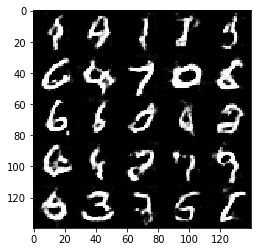

Epoch 2/2... Batch 410... Discriminator Loss: 1.0089... Generator Loss: 0.9062
Epoch 2/2... Batch 420... Discriminator Loss: 1.0127... Generator Loss: 1.0050
Epoch 2/2... Batch 430... Discriminator Loss: 1.0177... Generator Loss: 0.9477
Epoch 2/2... Batch 440... Discriminator Loss: 0.9523... Generator Loss: 1.1581
Epoch 2/2... Batch 450... Discriminator Loss: 1.1982... Generator Loss: 0.6277
Epoch 2/2... Batch 460... Discriminator Loss: 1.0461... Generator Loss: 0.7584


In [20]:
batch_size = 128
z_dim = 128
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Batch 10... Discriminator Loss: 4.1220... Generator Loss: 0.0348
Epoch 1/1... Batch 20... Discriminator Loss: 2.3218... Generator Loss: 0.1967
Epoch 1/1... Batch 30... Discriminator Loss: 3.5424... Generator Loss: 0.0746
Epoch 1/1... Batch 40... Discriminator Loss: 1.8400... Generator Loss: 0.3676
Epoch 1/1... Batch 50... Discriminator Loss: 1.5465... Generator Loss: 0.4749
Epoch 1/1... Batch 60... Discriminator Loss: 1.5931... Generator Loss: 0.4968
Epoch 1/1... Batch 70... Discriminator Loss: 1.9486... Generator Loss: 0.4043
Epoch 1/1... Batch 80... Discriminator Loss: 1.8325... Generator Loss: 0.4316
Epoch 1/1... Batch 90... Discriminator Loss: 1.5322... Generator Loss: 0.6042
Epoch 1/1... Batch 100... Discriminator Loss: 1.5487... Generator Loss: 0.4902


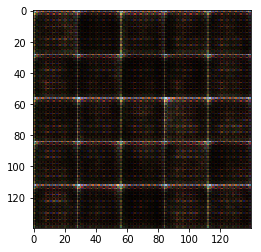

Epoch 1/1... Batch 110... Discriminator Loss: 1.5946... Generator Loss: 0.5007
Epoch 1/1... Batch 120... Discriminator Loss: 1.5465... Generator Loss: 0.5186
Epoch 1/1... Batch 130... Discriminator Loss: 1.4427... Generator Loss: 0.7676
Epoch 1/1... Batch 140... Discriminator Loss: 1.5403... Generator Loss: 1.4001
Epoch 1/1... Batch 150... Discriminator Loss: 1.4204... Generator Loss: 0.8325
Epoch 1/1... Batch 160... Discriminator Loss: 1.6710... Generator Loss: 0.5240
Epoch 1/1... Batch 170... Discriminator Loss: 1.5848... Generator Loss: 0.5450
Epoch 1/1... Batch 180... Discriminator Loss: 1.5445... Generator Loss: 0.5060
Epoch 1/1... Batch 190... Discriminator Loss: 1.3094... Generator Loss: 0.7023
Epoch 1/1... Batch 200... Discriminator Loss: 1.4976... Generator Loss: 0.5535


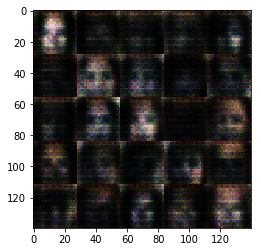

Epoch 1/1... Batch 210... Discriminator Loss: 1.4012... Generator Loss: 0.7190
Epoch 1/1... Batch 220... Discriminator Loss: 1.3410... Generator Loss: 0.6778
Epoch 1/1... Batch 230... Discriminator Loss: 1.3362... Generator Loss: 0.6458
Epoch 1/1... Batch 240... Discriminator Loss: 1.3312... Generator Loss: 0.7374
Epoch 1/1... Batch 250... Discriminator Loss: 1.4588... Generator Loss: 0.6563
Epoch 1/1... Batch 260... Discriminator Loss: 1.4012... Generator Loss: 0.7334
Epoch 1/1... Batch 270... Discriminator Loss: 1.5520... Generator Loss: 0.5117
Epoch 1/1... Batch 280... Discriminator Loss: 1.4917... Generator Loss: 0.9501
Epoch 1/1... Batch 290... Discriminator Loss: 1.4206... Generator Loss: 0.7345
Epoch 1/1... Batch 300... Discriminator Loss: 1.4188... Generator Loss: 0.5783


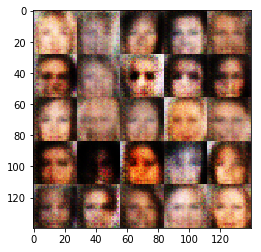

Epoch 1/1... Batch 310... Discriminator Loss: 1.4008... Generator Loss: 0.9904
Epoch 1/1... Batch 320... Discriminator Loss: 1.5438... Generator Loss: 0.5027
Epoch 1/1... Batch 330... Discriminator Loss: 1.4110... Generator Loss: 0.8995
Epoch 1/1... Batch 340... Discriminator Loss: 1.4843... Generator Loss: 0.8694
Epoch 1/1... Batch 350... Discriminator Loss: 1.4190... Generator Loss: 0.9492
Epoch 1/1... Batch 360... Discriminator Loss: 1.4061... Generator Loss: 0.9706
Epoch 1/1... Batch 370... Discriminator Loss: 1.3961... Generator Loss: 0.7526
Epoch 1/1... Batch 380... Discriminator Loss: 1.3987... Generator Loss: 0.9941
Epoch 1/1... Batch 390... Discriminator Loss: 1.4475... Generator Loss: 0.9325
Epoch 1/1... Batch 400... Discriminator Loss: 1.4123... Generator Loss: 0.8426


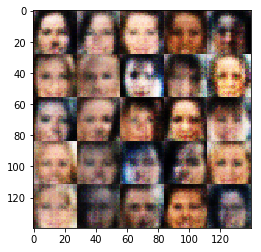

Epoch 1/1... Batch 410... Discriminator Loss: 1.3921... Generator Loss: 0.8405
Epoch 1/1... Batch 420... Discriminator Loss: 1.3640... Generator Loss: 0.9420
Epoch 1/1... Batch 430... Discriminator Loss: 1.3910... Generator Loss: 0.7153
Epoch 1/1... Batch 440... Discriminator Loss: 1.5666... Generator Loss: 1.0376
Epoch 1/1... Batch 450... Discriminator Loss: 1.4069... Generator Loss: 0.7758
Epoch 1/1... Batch 460... Discriminator Loss: 1.4368... Generator Loss: 0.6560
Epoch 1/1... Batch 470... Discriminator Loss: 1.3986... Generator Loss: 0.7803
Epoch 1/1... Batch 480... Discriminator Loss: 1.4230... Generator Loss: 0.7046
Epoch 1/1... Batch 490... Discriminator Loss: 1.3469... Generator Loss: 0.7879
Epoch 1/1... Batch 500... Discriminator Loss: 1.4135... Generator Loss: 1.0779


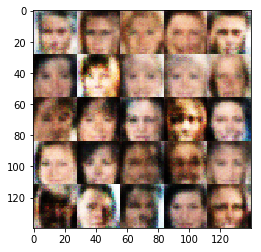

Epoch 1/1... Batch 510... Discriminator Loss: 1.4243... Generator Loss: 0.5979
Epoch 1/1... Batch 520... Discriminator Loss: 1.3558... Generator Loss: 0.6932
Epoch 1/1... Batch 530... Discriminator Loss: 1.4258... Generator Loss: 0.5766
Epoch 1/1... Batch 540... Discriminator Loss: 1.4217... Generator Loss: 0.6265
Epoch 1/1... Batch 550... Discriminator Loss: 1.3774... Generator Loss: 0.7451
Epoch 1/1... Batch 560... Discriminator Loss: 1.3652... Generator Loss: 0.7852
Epoch 1/1... Batch 570... Discriminator Loss: 1.4764... Generator Loss: 0.9116
Epoch 1/1... Batch 580... Discriminator Loss: 1.4205... Generator Loss: 0.8916
Epoch 1/1... Batch 590... Discriminator Loss: 1.3980... Generator Loss: 1.1086
Epoch 1/1... Batch 600... Discriminator Loss: 1.3632... Generator Loss: 0.8173


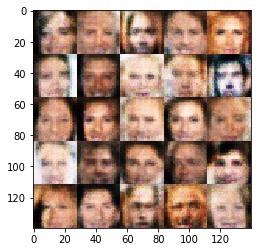

Epoch 1/1... Batch 610... Discriminator Loss: 1.4252... Generator Loss: 1.0580
Epoch 1/1... Batch 620... Discriminator Loss: 1.3877... Generator Loss: 0.8809
Epoch 1/1... Batch 630... Discriminator Loss: 1.4136... Generator Loss: 1.0193
Epoch 1/1... Batch 640... Discriminator Loss: 1.3795... Generator Loss: 0.8931
Epoch 1/1... Batch 650... Discriminator Loss: 1.3403... Generator Loss: 0.9304
Epoch 1/1... Batch 660... Discriminator Loss: 1.3720... Generator Loss: 0.9795
Epoch 1/1... Batch 670... Discriminator Loss: 1.3791... Generator Loss: 0.7566
Epoch 1/1... Batch 680... Discriminator Loss: 1.3918... Generator Loss: 0.6767
Epoch 1/1... Batch 690... Discriminator Loss: 1.3470... Generator Loss: 0.9076
Epoch 1/1... Batch 700... Discriminator Loss: 1.4119... Generator Loss: 1.0910


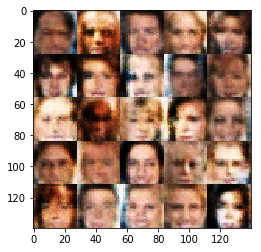

Epoch 1/1... Batch 710... Discriminator Loss: 1.3870... Generator Loss: 0.8485
Epoch 1/1... Batch 720... Discriminator Loss: 1.2873... Generator Loss: 0.8910
Epoch 1/1... Batch 730... Discriminator Loss: 1.6993... Generator Loss: 0.3430
Epoch 1/1... Batch 740... Discriminator Loss: 1.3811... Generator Loss: 0.7591
Epoch 1/1... Batch 750... Discriminator Loss: 1.4177... Generator Loss: 0.6850
Epoch 1/1... Batch 760... Discriminator Loss: 1.3727... Generator Loss: 1.1956
Epoch 1/1... Batch 770... Discriminator Loss: 1.3053... Generator Loss: 0.7149
Epoch 1/1... Batch 780... Discriminator Loss: 1.3630... Generator Loss: 0.7180
Epoch 1/1... Batch 790... Discriminator Loss: 1.5362... Generator Loss: 0.4509
Epoch 1/1... Batch 800... Discriminator Loss: 1.3593... Generator Loss: 0.7500


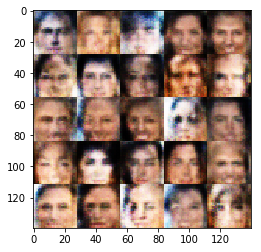

Epoch 1/1... Batch 810... Discriminator Loss: 1.4677... Generator Loss: 1.1363
Epoch 1/1... Batch 820... Discriminator Loss: 1.4208... Generator Loss: 0.5554
Epoch 1/1... Batch 830... Discriminator Loss: 1.3648... Generator Loss: 0.6129
Epoch 1/1... Batch 840... Discriminator Loss: 1.5544... Generator Loss: 0.4610
Epoch 1/1... Batch 850... Discriminator Loss: 1.3696... Generator Loss: 0.7081
Epoch 1/1... Batch 860... Discriminator Loss: 1.4578... Generator Loss: 1.0969
Epoch 1/1... Batch 870... Discriminator Loss: 1.4726... Generator Loss: 1.0841
Epoch 1/1... Batch 880... Discriminator Loss: 1.3326... Generator Loss: 1.0667
Epoch 1/1... Batch 890... Discriminator Loss: 1.5621... Generator Loss: 0.4426
Epoch 1/1... Batch 900... Discriminator Loss: 1.2879... Generator Loss: 0.7880


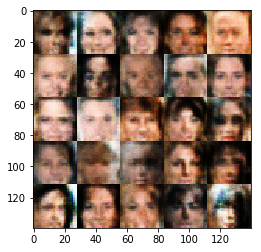

Epoch 1/1... Batch 910... Discriminator Loss: 1.6120... Generator Loss: 0.4172
Epoch 1/1... Batch 920... Discriminator Loss: 1.3039... Generator Loss: 0.7564
Epoch 1/1... Batch 930... Discriminator Loss: 1.2404... Generator Loss: 1.3115
Epoch 1/1... Batch 940... Discriminator Loss: 1.3402... Generator Loss: 1.0409
Epoch 1/1... Batch 950... Discriminator Loss: 1.3295... Generator Loss: 0.9620
Epoch 1/1... Batch 960... Discriminator Loss: 1.3967... Generator Loss: 1.0006
Epoch 1/1... Batch 970... Discriminator Loss: 1.3615... Generator Loss: 0.6421
Epoch 1/1... Batch 980... Discriminator Loss: 1.4401... Generator Loss: 0.5178
Epoch 1/1... Batch 990... Discriminator Loss: 1.3064... Generator Loss: 0.9065
Epoch 1/1... Batch 1000... Discriminator Loss: 1.2830... Generator Loss: 0.8462


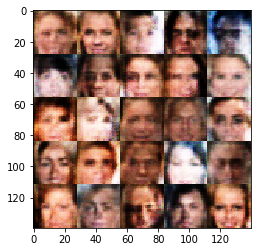

Epoch 1/1... Batch 1010... Discriminator Loss: 1.6943... Generator Loss: 1.9675
Epoch 1/1... Batch 1020... Discriminator Loss: 1.2055... Generator Loss: 1.0724
Epoch 1/1... Batch 1030... Discriminator Loss: 1.1668... Generator Loss: 0.9687
Epoch 1/1... Batch 1040... Discriminator Loss: 2.0286... Generator Loss: 2.2926
Epoch 1/1... Batch 1050... Discriminator Loss: 1.1843... Generator Loss: 1.0582
Epoch 1/1... Batch 1060... Discriminator Loss: 1.2377... Generator Loss: 0.9173
Epoch 1/1... Batch 1070... Discriminator Loss: 1.5333... Generator Loss: 0.5272
Epoch 1/1... Batch 1080... Discriminator Loss: 1.2056... Generator Loss: 1.3812
Epoch 1/1... Batch 1090... Discriminator Loss: 1.7566... Generator Loss: 2.0155
Epoch 1/1... Batch 1100... Discriminator Loss: 1.4064... Generator Loss: 1.4795


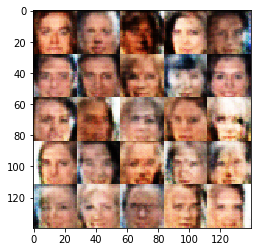

Epoch 1/1... Batch 1110... Discriminator Loss: 1.2328... Generator Loss: 1.0695
Epoch 1/1... Batch 1120... Discriminator Loss: 1.4309... Generator Loss: 0.8057
Epoch 1/1... Batch 1130... Discriminator Loss: 1.3170... Generator Loss: 1.1691
Epoch 1/1... Batch 1140... Discriminator Loss: 1.4103... Generator Loss: 0.8847
Epoch 1/1... Batch 1150... Discriminator Loss: 1.2168... Generator Loss: 0.7683
Epoch 1/1... Batch 1160... Discriminator Loss: 1.3992... Generator Loss: 0.7792
Epoch 1/1... Batch 1170... Discriminator Loss: 1.2662... Generator Loss: 0.7524
Epoch 1/1... Batch 1180... Discriminator Loss: 1.5329... Generator Loss: 0.4766
Epoch 1/1... Batch 1190... Discriminator Loss: 1.4766... Generator Loss: 0.4835
Epoch 1/1... Batch 1200... Discriminator Loss: 1.0555... Generator Loss: 2.0814


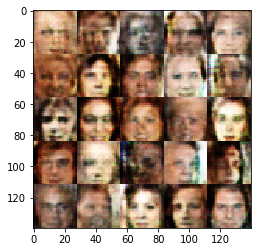

Epoch 1/1... Batch 1210... Discriminator Loss: 1.4226... Generator Loss: 0.7472
Epoch 1/1... Batch 1220... Discriminator Loss: 1.3948... Generator Loss: 0.5214
Epoch 1/1... Batch 1230... Discriminator Loss: 1.1723... Generator Loss: 1.8016
Epoch 1/1... Batch 1240... Discriminator Loss: 1.0675... Generator Loss: 0.9866
Epoch 1/1... Batch 1250... Discriminator Loss: 1.6422... Generator Loss: 0.3707
Epoch 1/1... Batch 1260... Discriminator Loss: 1.3071... Generator Loss: 0.6381
Epoch 1/1... Batch 1270... Discriminator Loss: 1.6735... Generator Loss: 0.3557
Epoch 1/1... Batch 1280... Discriminator Loss: 1.2710... Generator Loss: 0.7736
Epoch 1/1... Batch 1290... Discriminator Loss: 1.2919... Generator Loss: 0.6585
Epoch 1/1... Batch 1300... Discriminator Loss: 1.3559... Generator Loss: 0.5980


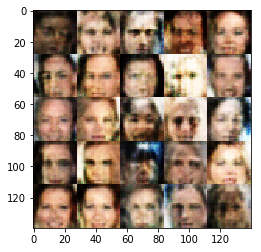

Epoch 1/1... Batch 1310... Discriminator Loss: 1.2831... Generator Loss: 0.9443
Epoch 1/1... Batch 1320... Discriminator Loss: 1.2502... Generator Loss: 0.8440
Epoch 1/1... Batch 1330... Discriminator Loss: 1.7149... Generator Loss: 0.3292
Epoch 1/1... Batch 1340... Discriminator Loss: 1.2998... Generator Loss: 0.6825
Epoch 1/1... Batch 1350... Discriminator Loss: 1.2047... Generator Loss: 0.8466
Epoch 1/1... Batch 1360... Discriminator Loss: 1.4562... Generator Loss: 0.7674
Epoch 1/1... Batch 1370... Discriminator Loss: 1.3463... Generator Loss: 0.8413
Epoch 1/1... Batch 1380... Discriminator Loss: 1.6069... Generator Loss: 1.5054
Epoch 1/1... Batch 1390... Discriminator Loss: 0.9672... Generator Loss: 1.4371
Epoch 1/1... Batch 1400... Discriminator Loss: 1.3442... Generator Loss: 0.9084


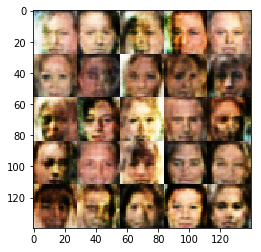

Epoch 1/1... Batch 1410... Discriminator Loss: 1.2315... Generator Loss: 0.8454
Epoch 1/1... Batch 1420... Discriminator Loss: 1.3919... Generator Loss: 0.8325
Epoch 1/1... Batch 1430... Discriminator Loss: 1.3886... Generator Loss: 0.6019
Epoch 1/1... Batch 1440... Discriminator Loss: 1.2347... Generator Loss: 0.9330
Epoch 1/1... Batch 1450... Discriminator Loss: 1.6678... Generator Loss: 0.3574
Epoch 1/1... Batch 1460... Discriminator Loss: 1.0658... Generator Loss: 1.4887
Epoch 1/1... Batch 1470... Discriminator Loss: 1.0598... Generator Loss: 1.1977
Epoch 1/1... Batch 1480... Discriminator Loss: 1.4802... Generator Loss: 0.6390
Epoch 1/1... Batch 1490... Discriminator Loss: 1.4655... Generator Loss: 1.1828
Epoch 1/1... Batch 1500... Discriminator Loss: 1.3809... Generator Loss: 0.8012


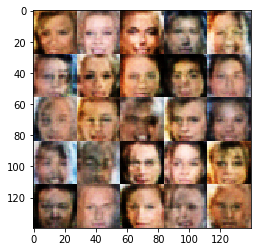

Epoch 1/1... Batch 1510... Discriminator Loss: 1.1888... Generator Loss: 0.9378
Epoch 1/1... Batch 1520... Discriminator Loss: 1.1435... Generator Loss: 1.5368
Epoch 1/1... Batch 1530... Discriminator Loss: 1.1134... Generator Loss: 0.8469
Epoch 1/1... Batch 1540... Discriminator Loss: 1.1718... Generator Loss: 1.1755
Epoch 1/1... Batch 1550... Discriminator Loss: 1.3485... Generator Loss: 0.9335
Epoch 1/1... Batch 1560... Discriminator Loss: 1.2129... Generator Loss: 0.8127
Epoch 1/1... Batch 1570... Discriminator Loss: 1.4478... Generator Loss: 0.6056
Epoch 1/1... Batch 1580... Discriminator Loss: 1.1816... Generator Loss: 1.2847


In [22]:
batch_size = 128
z_dim = 128
learning_rate = 0.0002
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.